# Exploratory Data Analysis

In this notebook, there is the exploratory Data Analysis performed to gain a holistic understanding of the datasets provided by PowerCo. The data sent over includes historical customer data, historical pricing data and churn indicator. 

In [150]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Loading Data

In [151]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')


In [152]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [153]:
price_data.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


## Descriptive Analytics

In [154]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [155]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


## Statistics

In [156]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [157]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Date Columns

From what is seen above, there are some columns that containing dates, we can convert these to datetime objects.

In [158]:
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_data[f] = pd.to_datetime(client_data[f])

In [159]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

## Label Encoding non-numerical data

In addition, there are some transformations that could be applied to our data. Non-numerical columns such as Channel Sales and Campaign Codes should be transformed to numerical values. In addition, has_gas will be decoded to 1 for true and 0 for false.

In [160]:
# label encoding
channel_encoder = LabelEncoder()
client_data['channel_sales'] = channel_encoder.fit_transform(client_data['channel_sales'])
origin_encoder = LabelEncoder()
client_data['origin_up'] = origin_encoder.fit_transform(client_data['origin_up'])

mapping = {'t': 1, 'f': 0}
client_data['has_gas'] = client_data['has_gas'].map(lambda x: mapping.get(x, x))

client_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.0,25.44,25.44,2,678.99,3,4,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.0,16.38,16.38,1,18.89,6,2,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.0,28.60,28.60,1,6.60,6,2,13.856,0


## Data Visualisation Functions

In [161]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')



def plot_scatter(dataframe, x_column, y_column, ax):
    """
    Plot a scatter plot of two columns, colored by churn
    """
    # Filter the dataframe by churn values (0 and 1)
    churn_0 = dataframe[dataframe['churn'] == 0]
    churn_1 = dataframe[dataframe['churn'] == 1]
    
    # Scatter plot for churn=0 (blue color)
    ax.scatter(churn_0[x_column], churn_0[y_column], color='blue', label='Churn=0')
    
    # Scatter plot for churn=1 (orange color)
    ax.scatter(churn_1[x_column], churn_1[y_column], color='orange', label='Churn=1')
    
    # Set labels and legend
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.legend()



def plot_simple_histogram(data, column, ax, bins_=50):

    ax.hist(data[column], bins=bins_)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(style='plain', axis='x')





### Churn on Company base

In the following graph, it can be seen that 9.7% of the company base has churned.

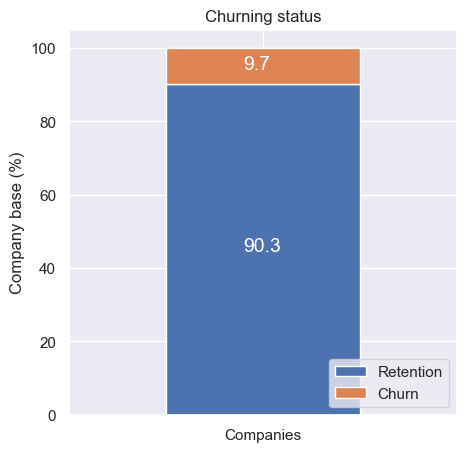

In [162]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### Channel Sales

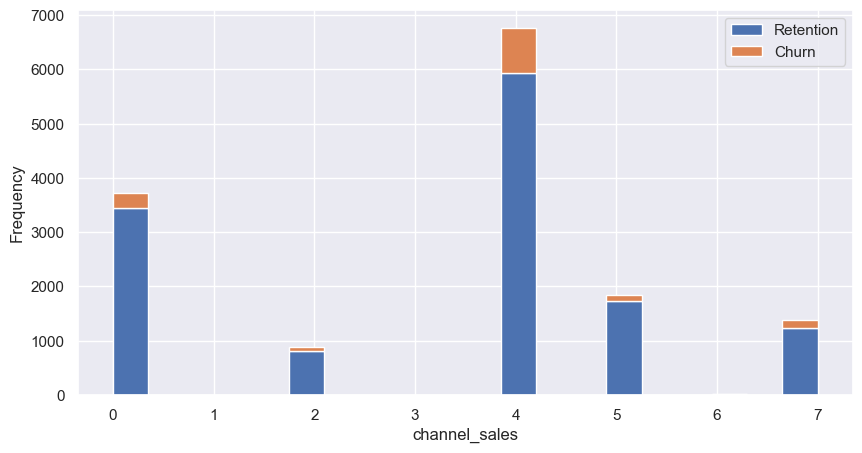

In [163]:
fig, axs = plt.subplots(nrows=1, figsize=(10,5))

plot_distribution(dataframe= client_data, column='channel_sales',ax= axs, bins_=20) 

### Electricity Campaign suscription

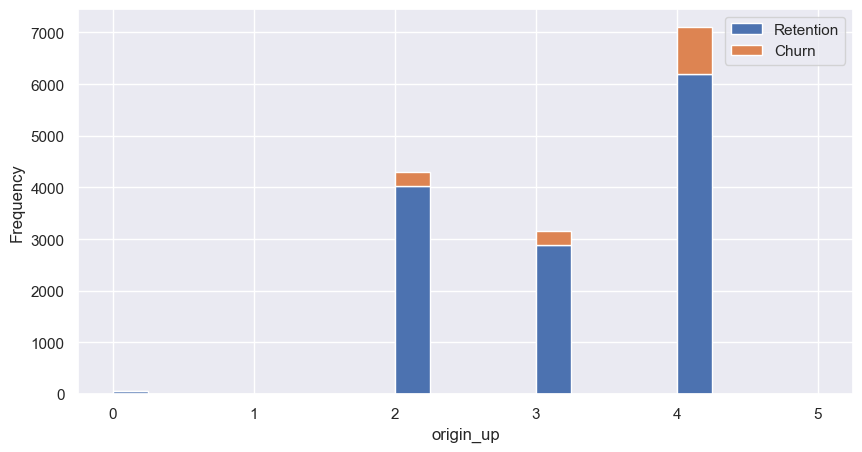

In [164]:
fig, axs = plt.subplots(nrows=1, figsize=(10,5))

plot_distribution(dataframe= client_data, column='origin_up',ax= axs, bins_=20) 

## Client Consumption

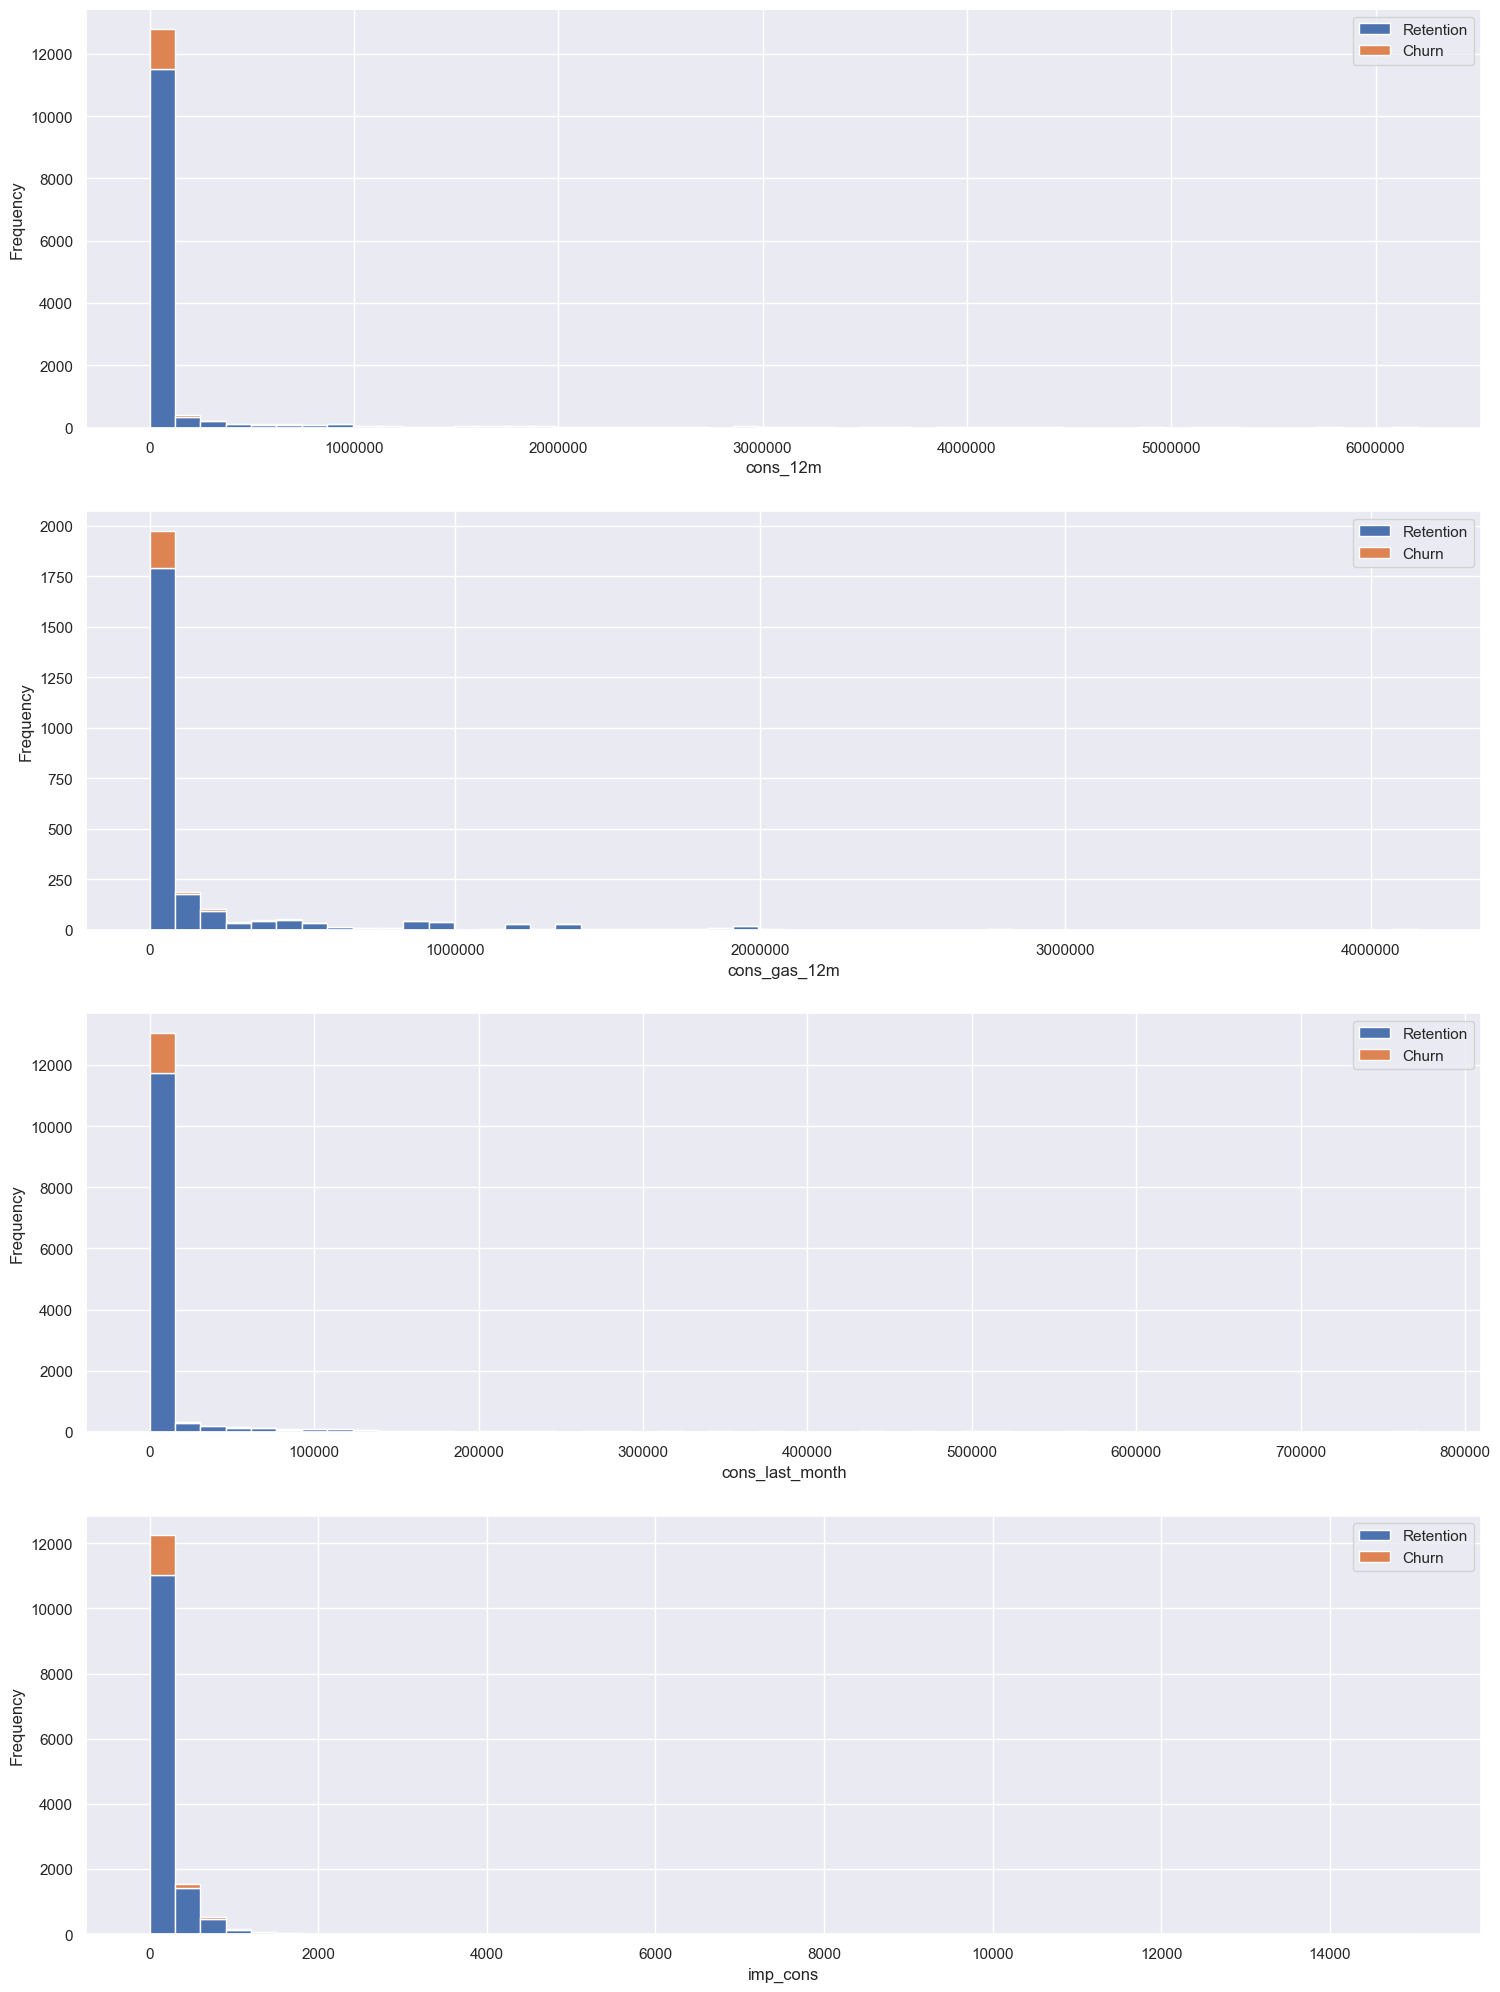

In [165]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']==1], 'cons_gas_12m',axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

It can be seen here that there is a long positive tail in the distribution, with a low number of values. This indicates that there are probably outliers that are not allowing us to observe properly the way the consumption data is distributed. This issue will be dealt with later, when performing feature engineering to input our data in a model.

A good way to visualise outliers is to use a boxplot. 

<Axes: xlabel='imp_cons'>

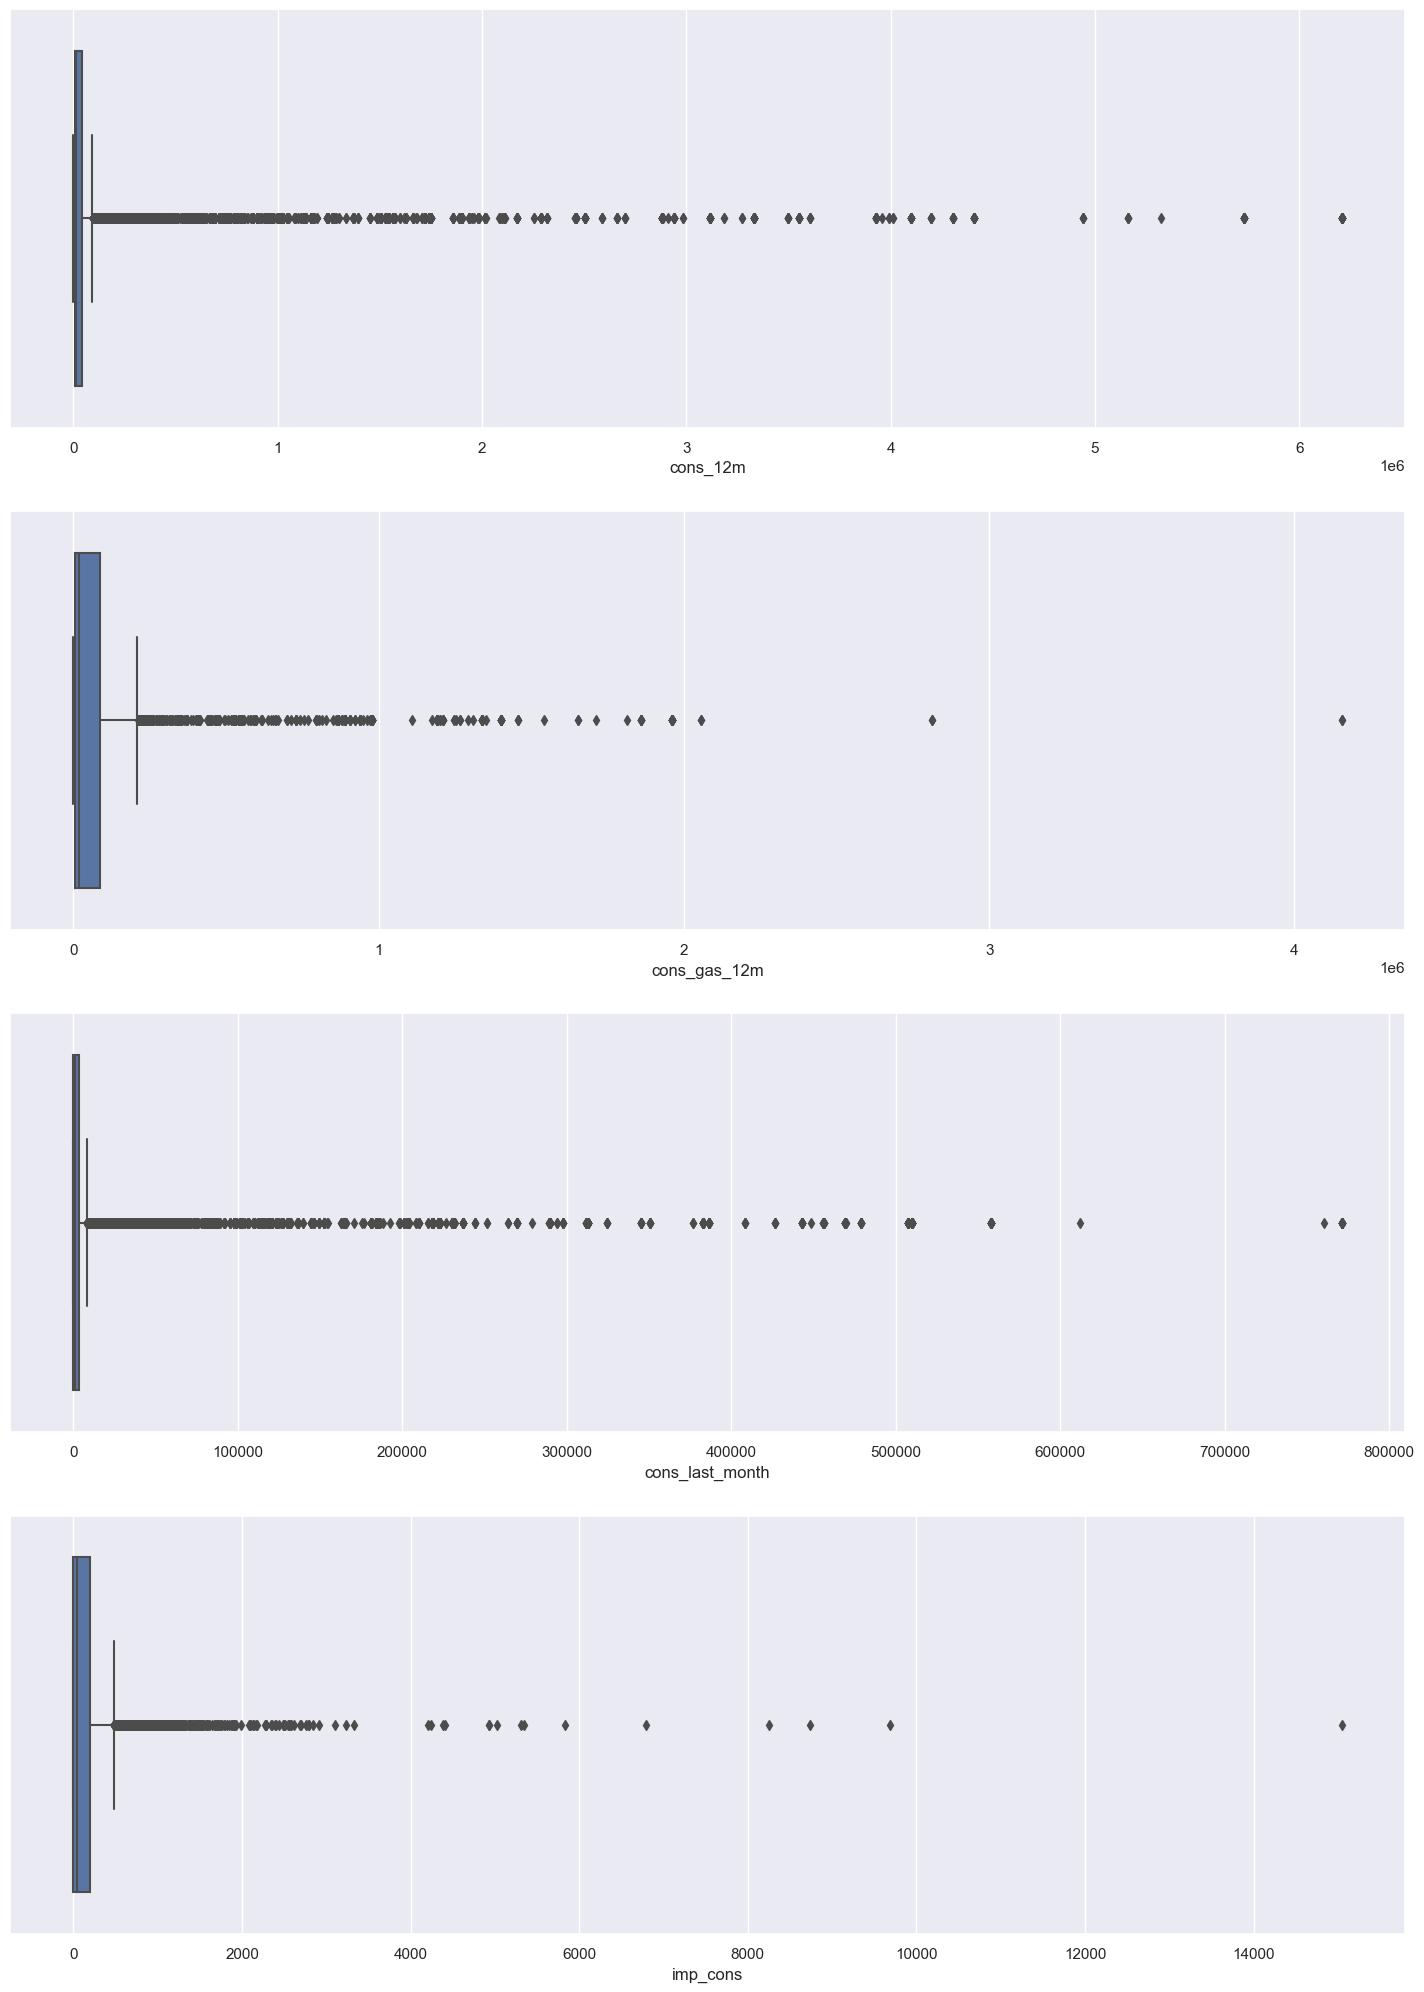

In [166]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

sns.boxplot(x=consumption["cons_12m"], ax= axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == 1]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], orient='h', ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], orient='h', ax=axs[3])

In the plots above, it can be observed that there are a few outliers that are the reason for the missrepresentation of our data. 

## Forecast Consumption

In the following plots, it can be observed that the forecast consumption for the next 12 months and year is similarly distributed to the previous year's. The churn percentage is also similar to that in the last year. 

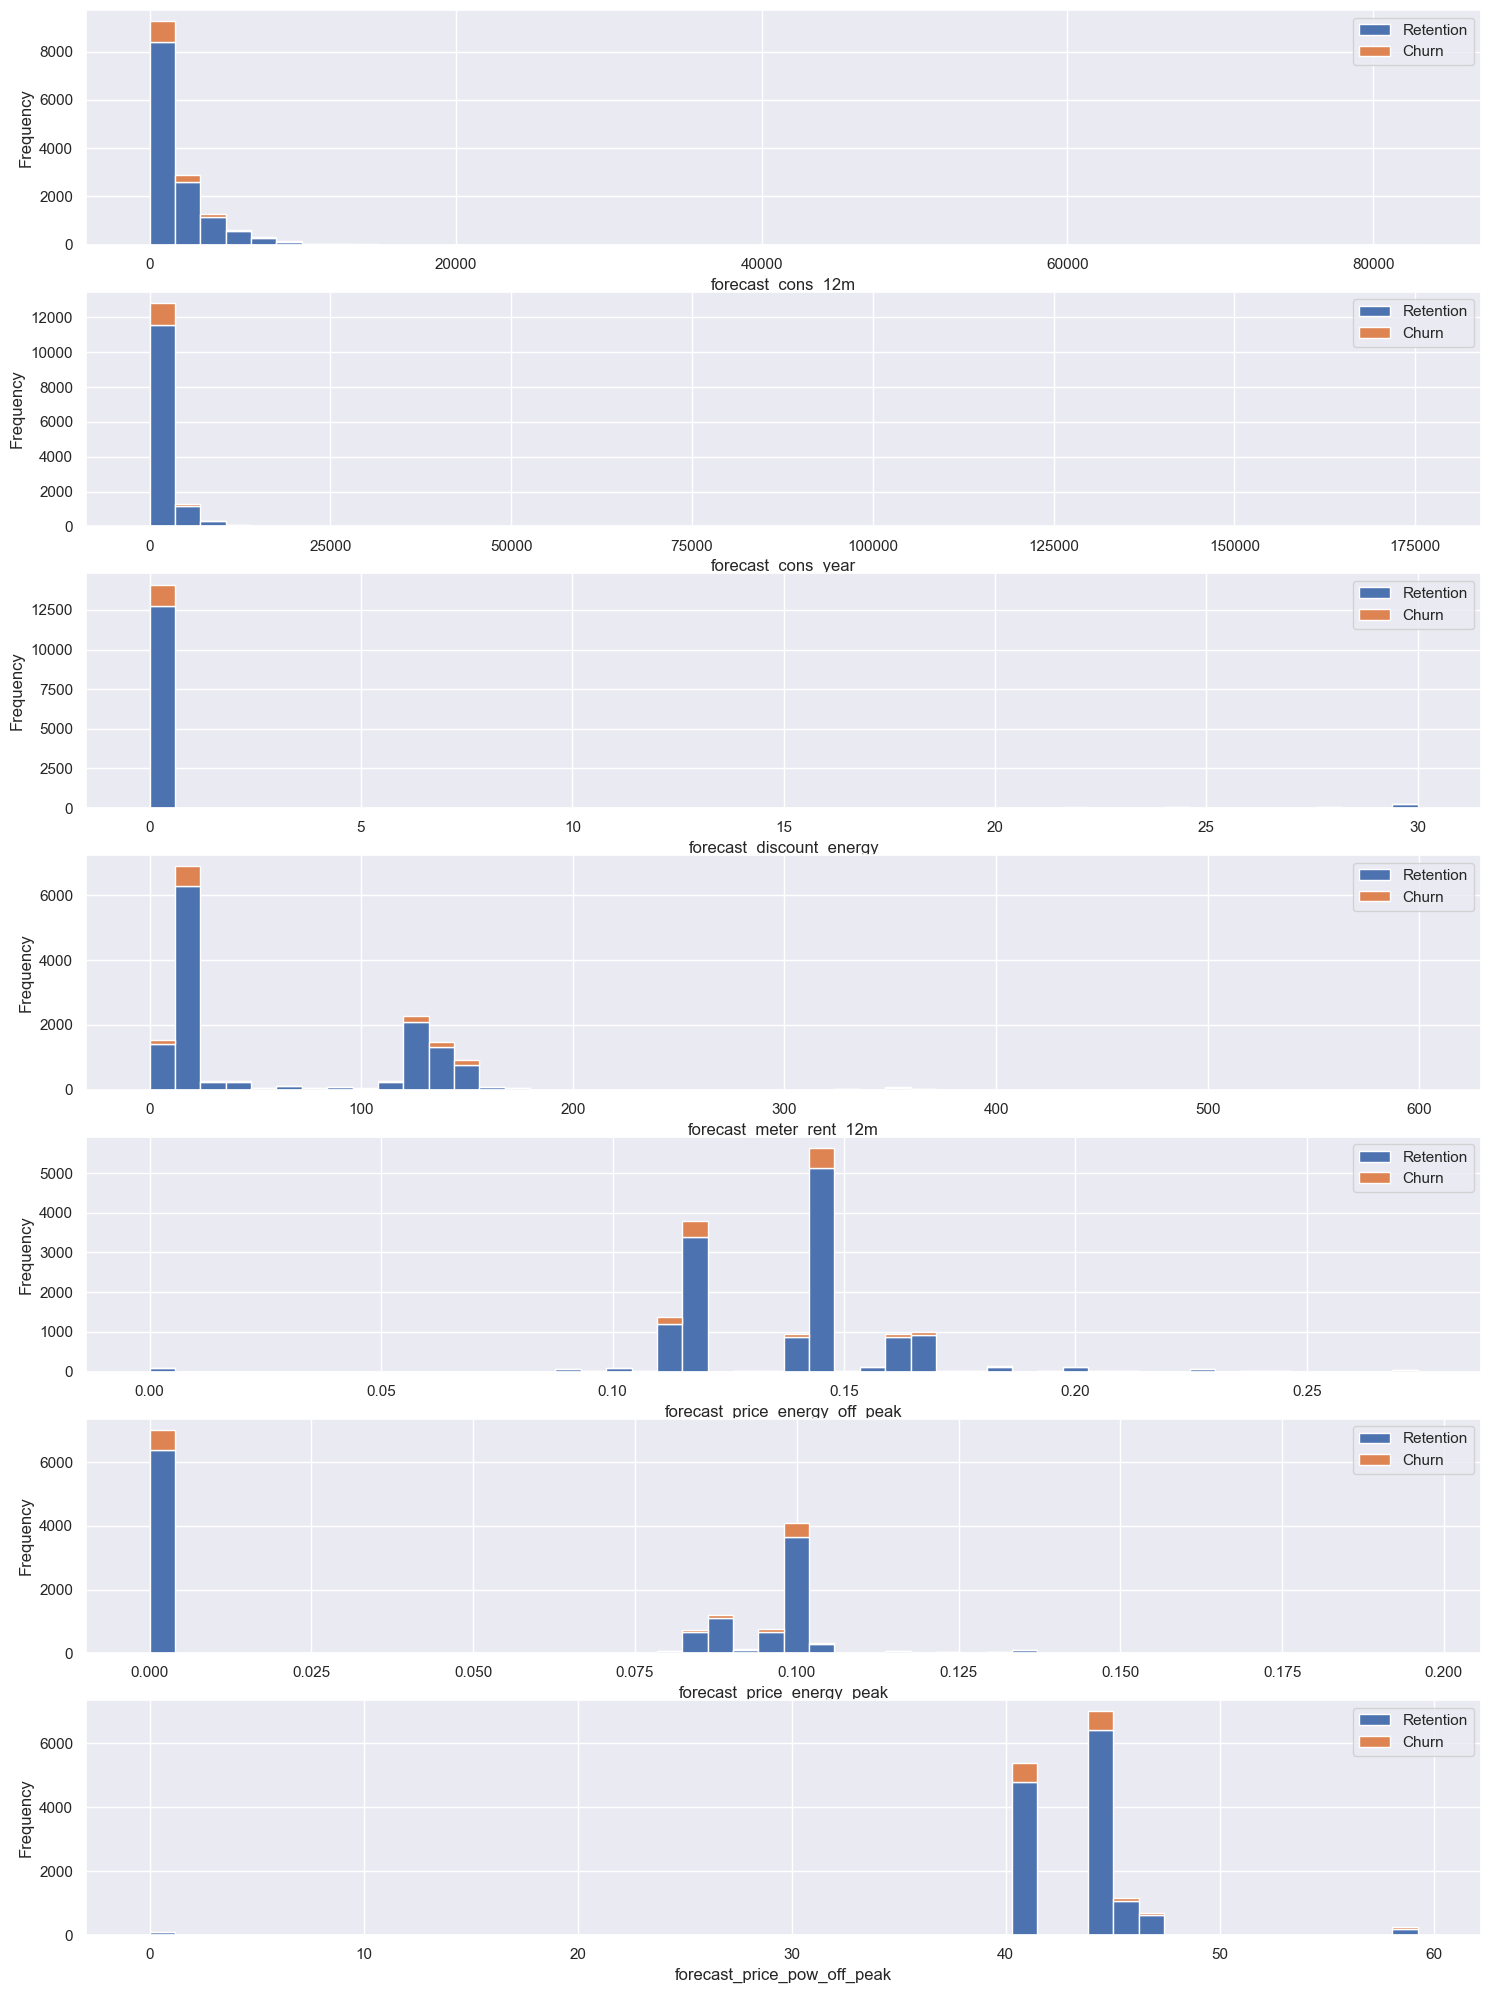

In [167]:
forecast_data = client_data[['id', 'forecast_cons_12m',
    'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
    'forecast_price_energy_off_peak','forecast_price_energy_peak',
    'forecast_price_pow_off_peak','churn']]

fig, axs = plt.subplots(nrows=7, figsize=(18,25))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

Similarly to the data about previous consumption, the data is highly positively skewed. Hence, it will have to go through some transformations for its use in the modelling part of the project. Below, it can be seen that there is also a few outliers. 

<Axes: xlabel='forecast_cons_12m'>

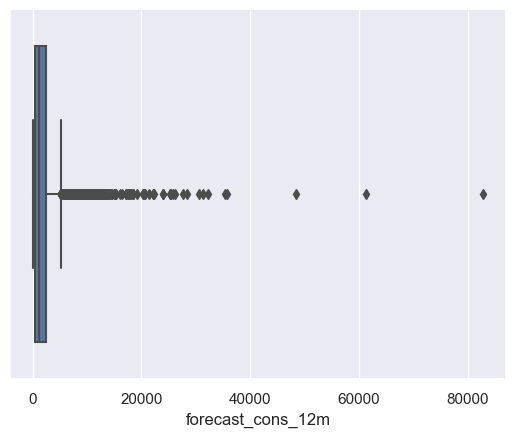

In [168]:
sns.boxplot(x=forecast_data["forecast_cons_12m"])


## Contract Type

In [169]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

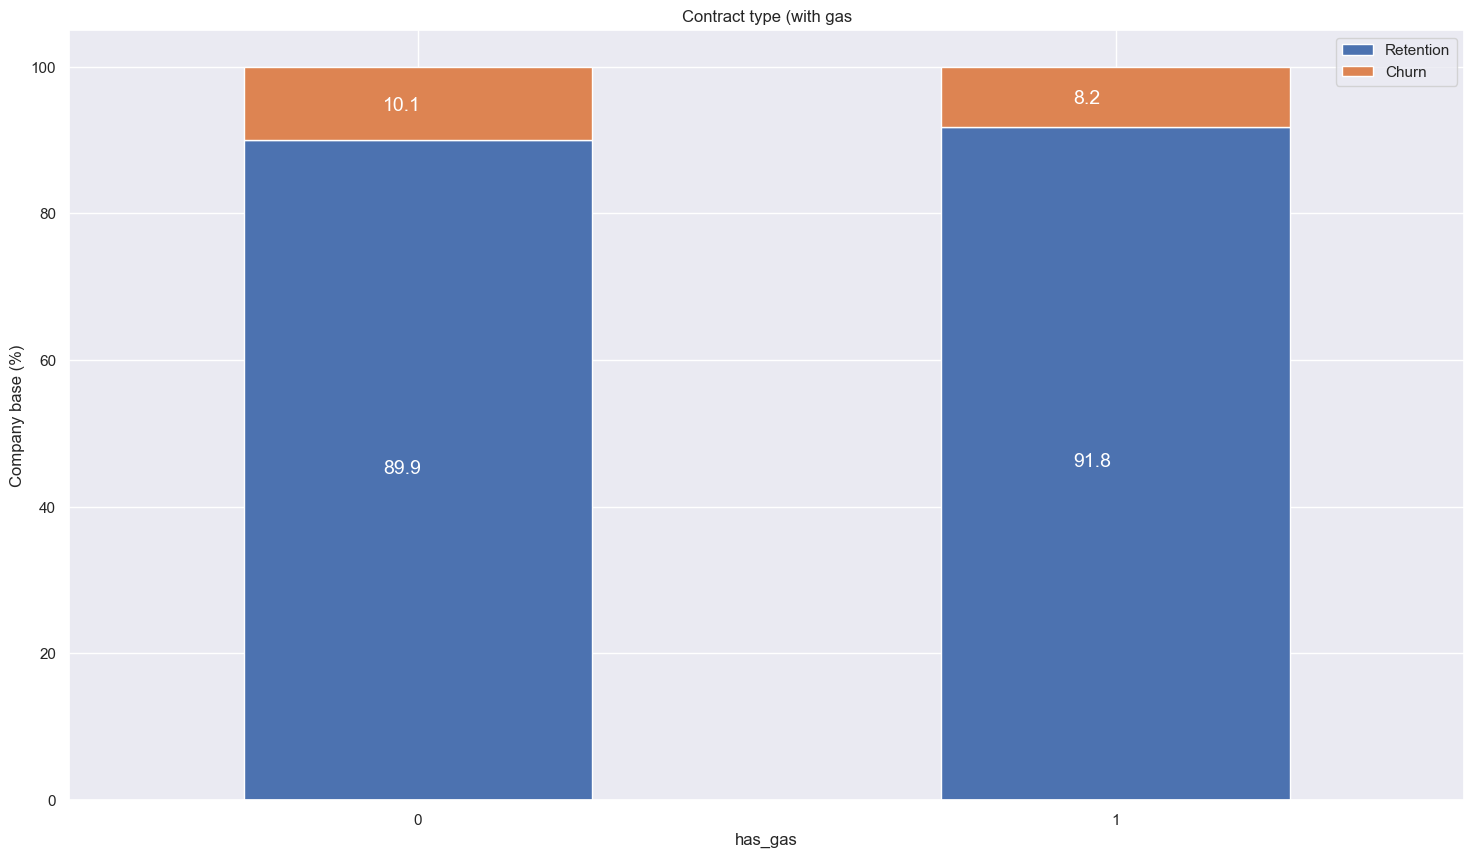

In [170]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

Seeing the stacked plots of type of contract and churn, it can be observed that the percentage of churn in contracts that include gas and those that do not is very similar. Therefore, this variable is not a linear indicator of churn. 

## Margins

In [171]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

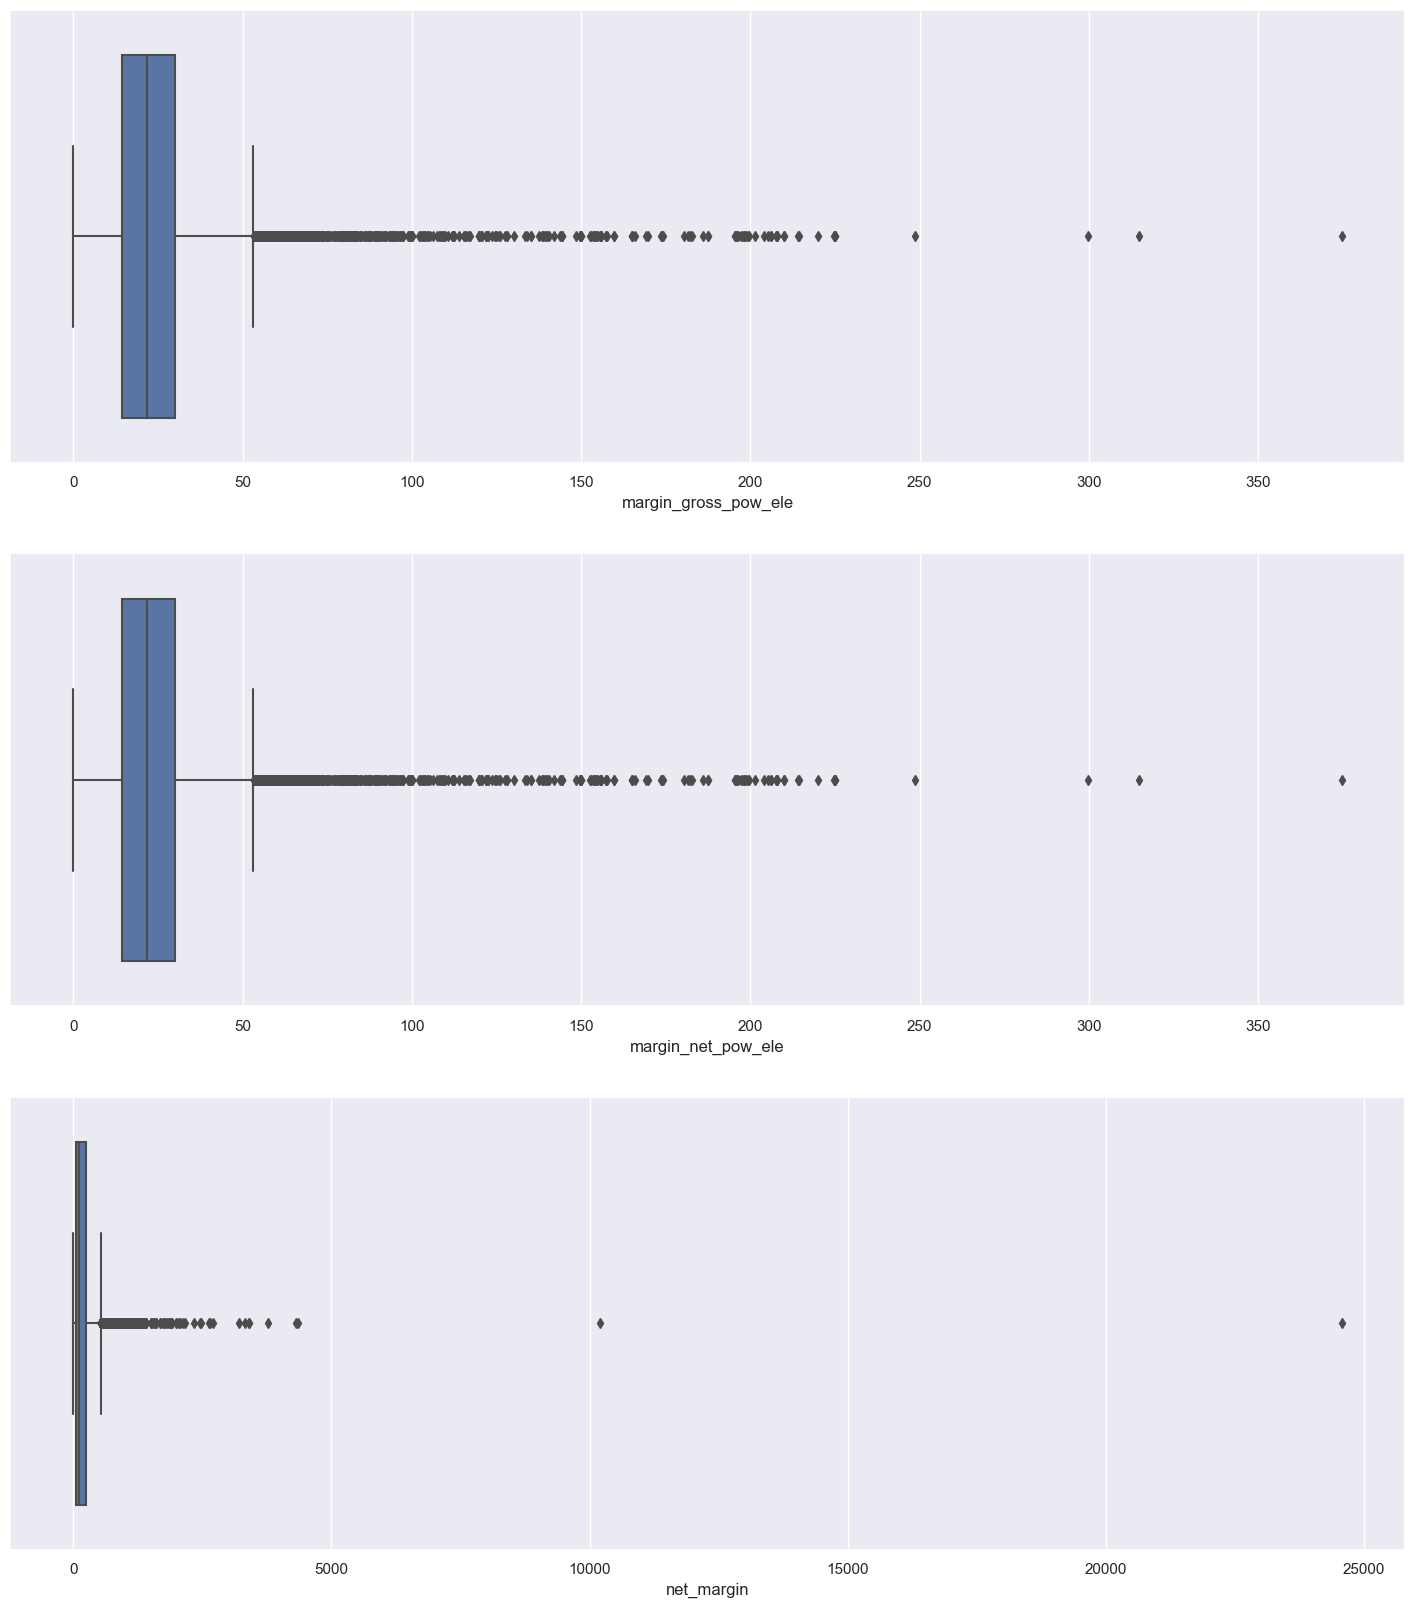

In [172]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

In the margin data, there are also some outliers that will have to be dealt with later. 

## Suscribed Power

In [173]:
power = client_data[['id', 'pow_max', 'churn']]

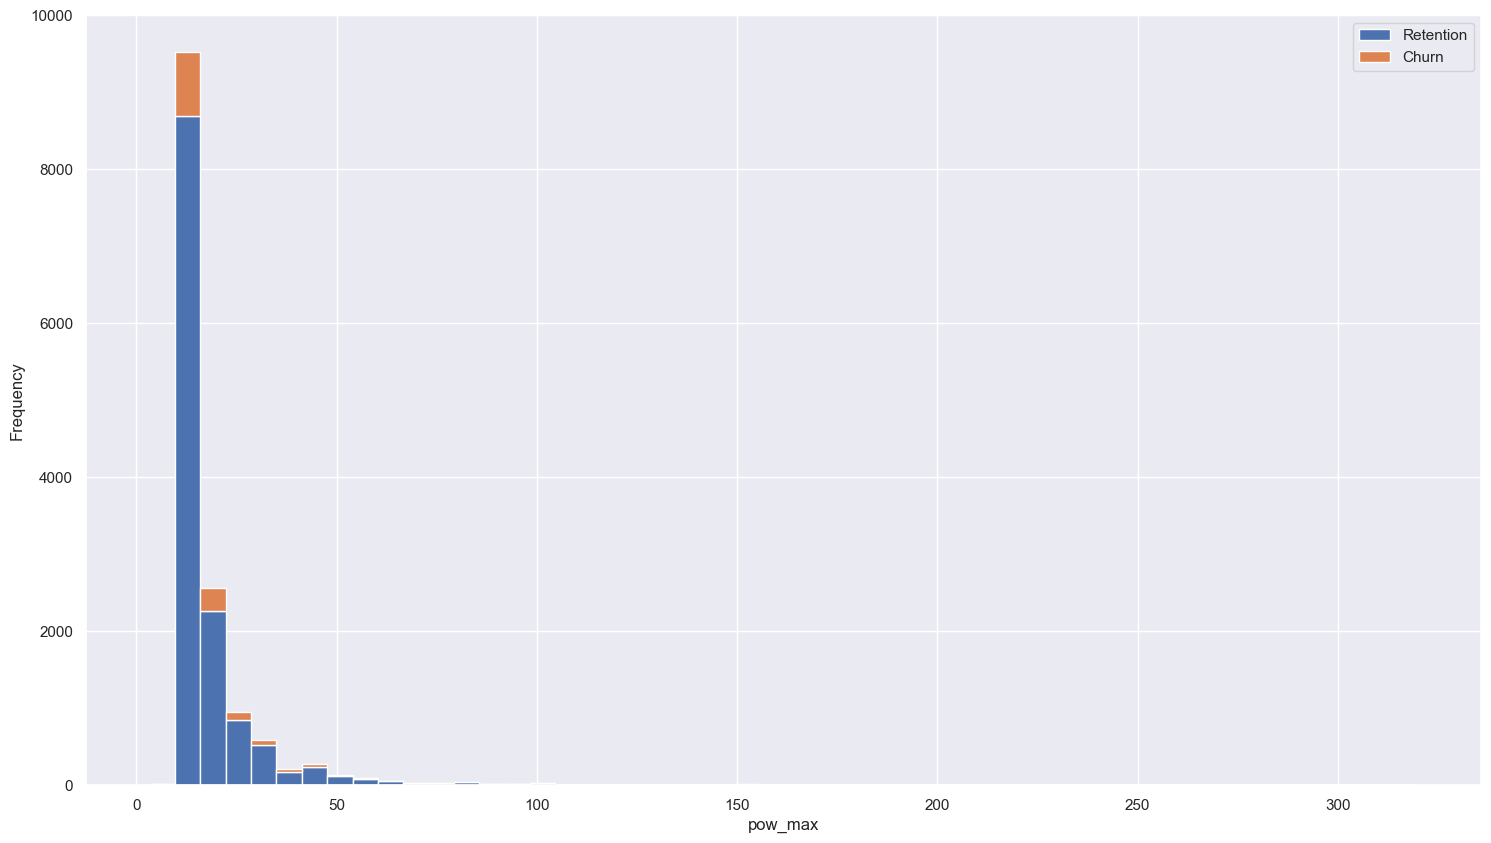

In [174]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

The maximum power also shows a long positive tail in the distribution. The high values could also be outliers, as it is shown in the plot below.

<Axes: xlabel='pow_max'>

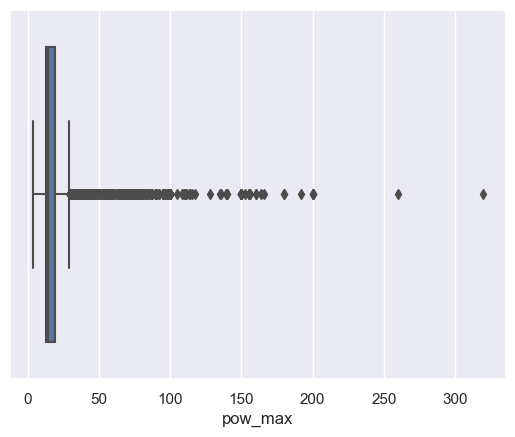

In [175]:
sns.boxplot(x=power["pow_max"])

### Number of Active Products

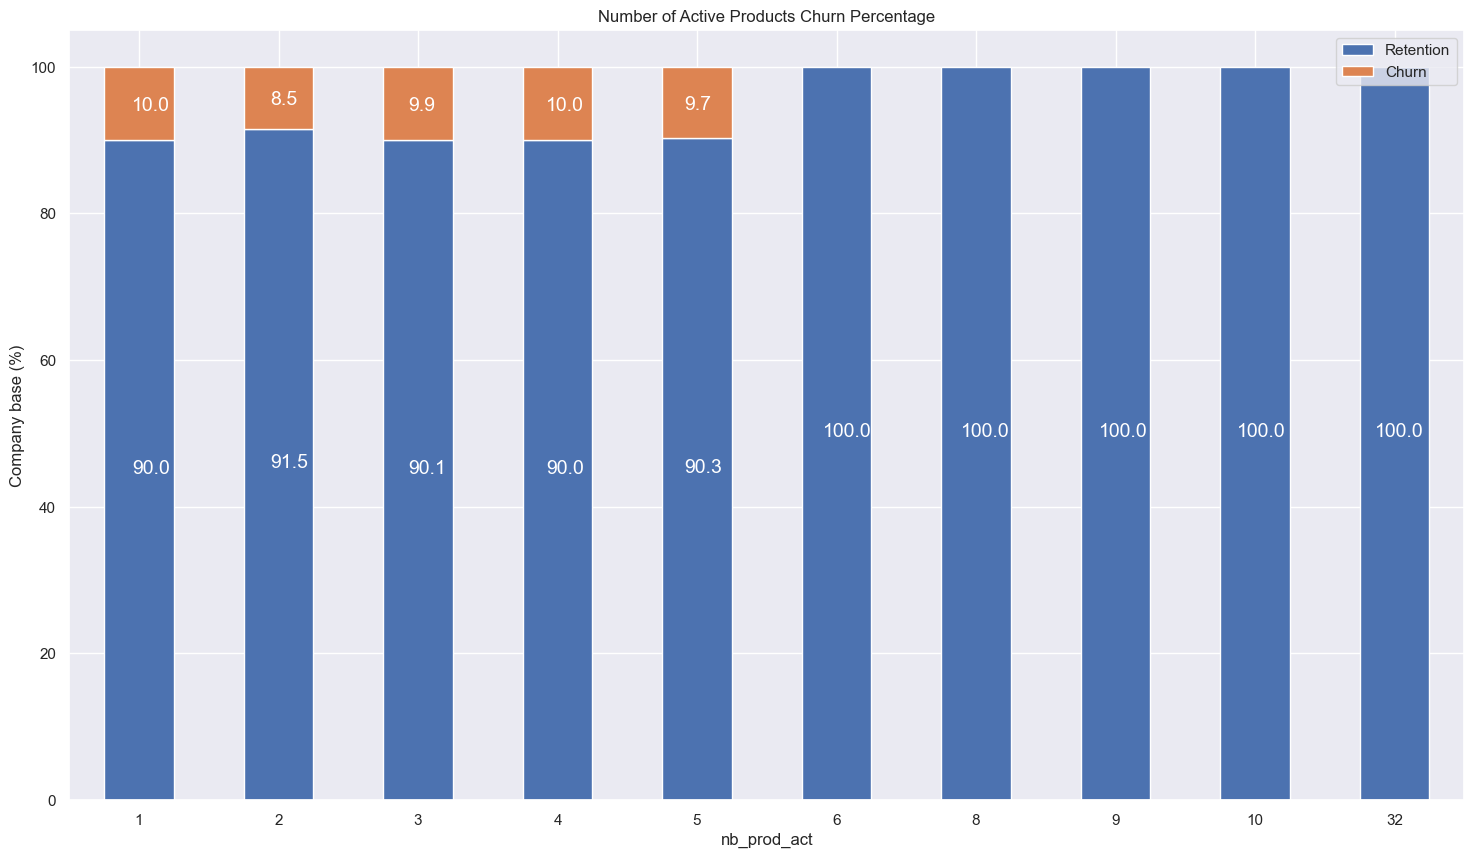

In [176]:
nb_prod_act = client_data.groupby([client_data['nb_prod_act'], client_data['churn']])['id'].count().unstack(level=1)
nb_prod_act_percentage = (nb_prod_act.div(nb_prod_act.sum(axis=1), axis=0)*100)
plot_stacked_bars(nb_prod_act_percentage, 'Number of Active Products Churn Percentage')

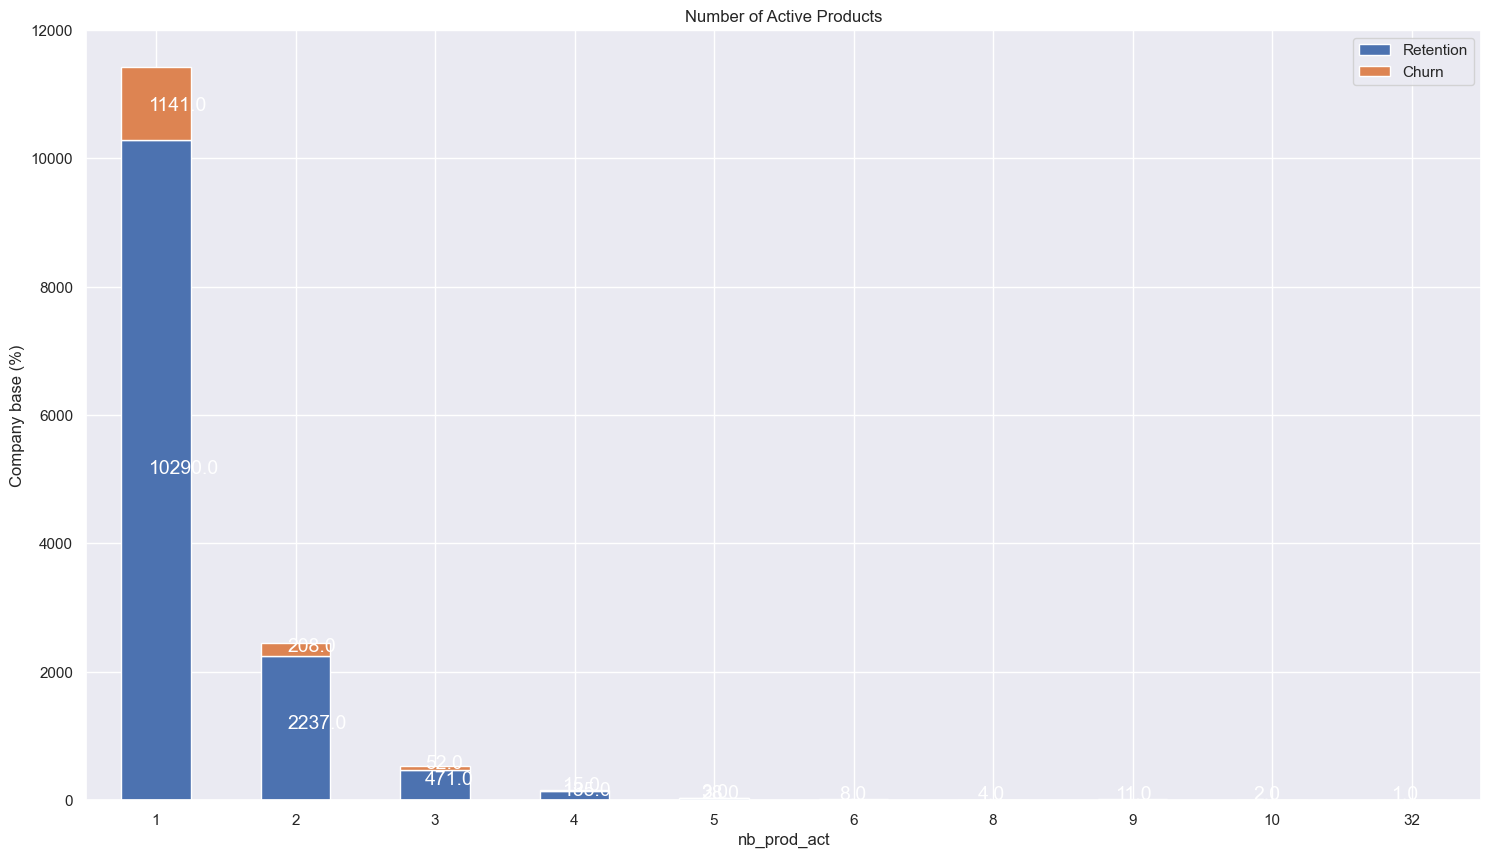

In [177]:
plot_stacked_bars(nb_prod_act, 'Number of Active Products')

The churn is existent in clients that have up to 5 products. All of the categories have a similar percentage of churn, but the highest ammount is in those who have only 1 product, which is the vast majority of the clients.

###  Years of Antiquity and Churn

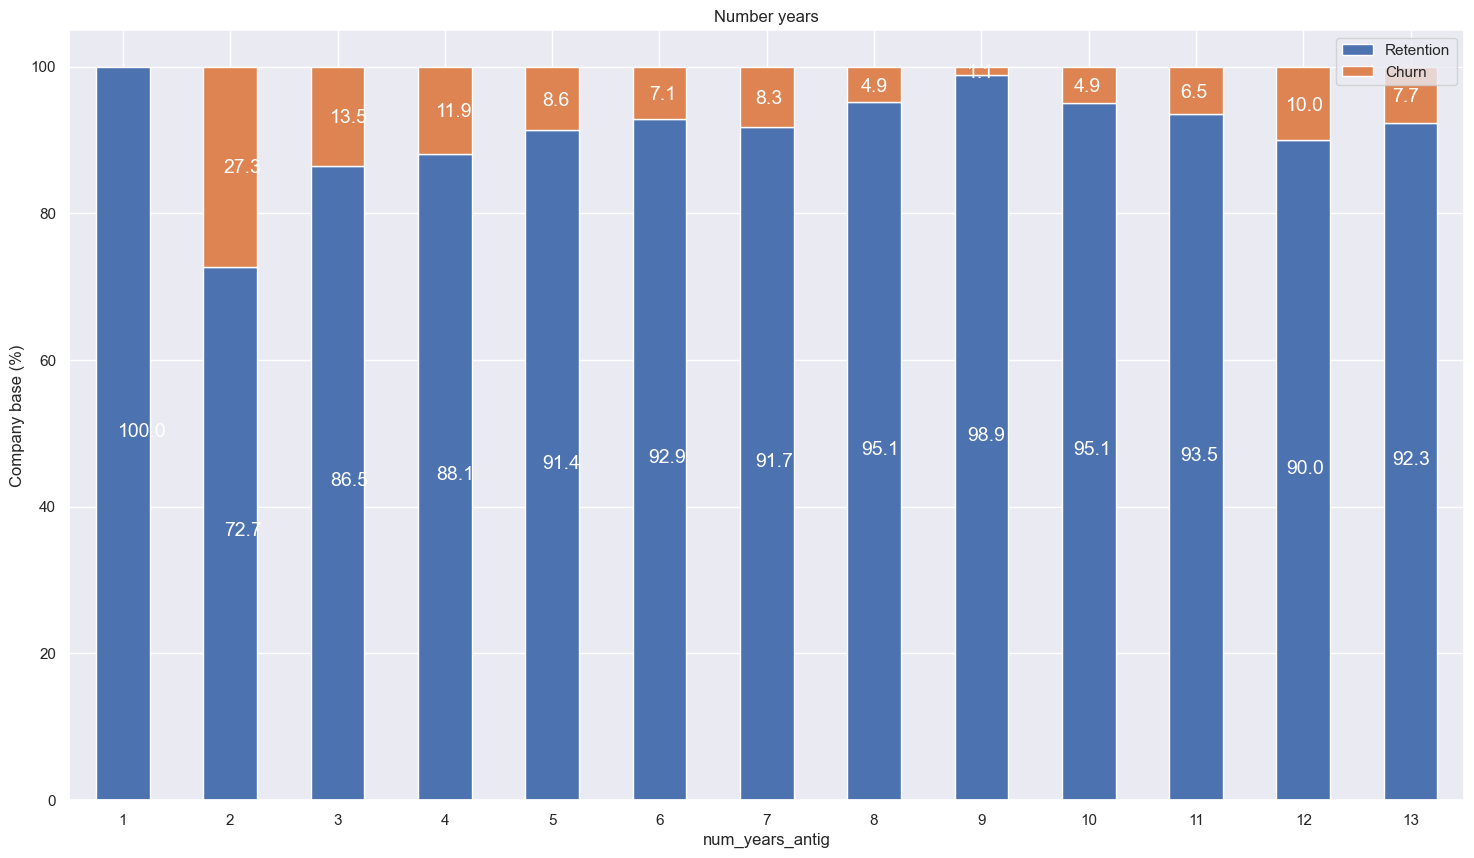

In [178]:
years_antig = client_data.groupby([client_data["num_years_antig"],client_data["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

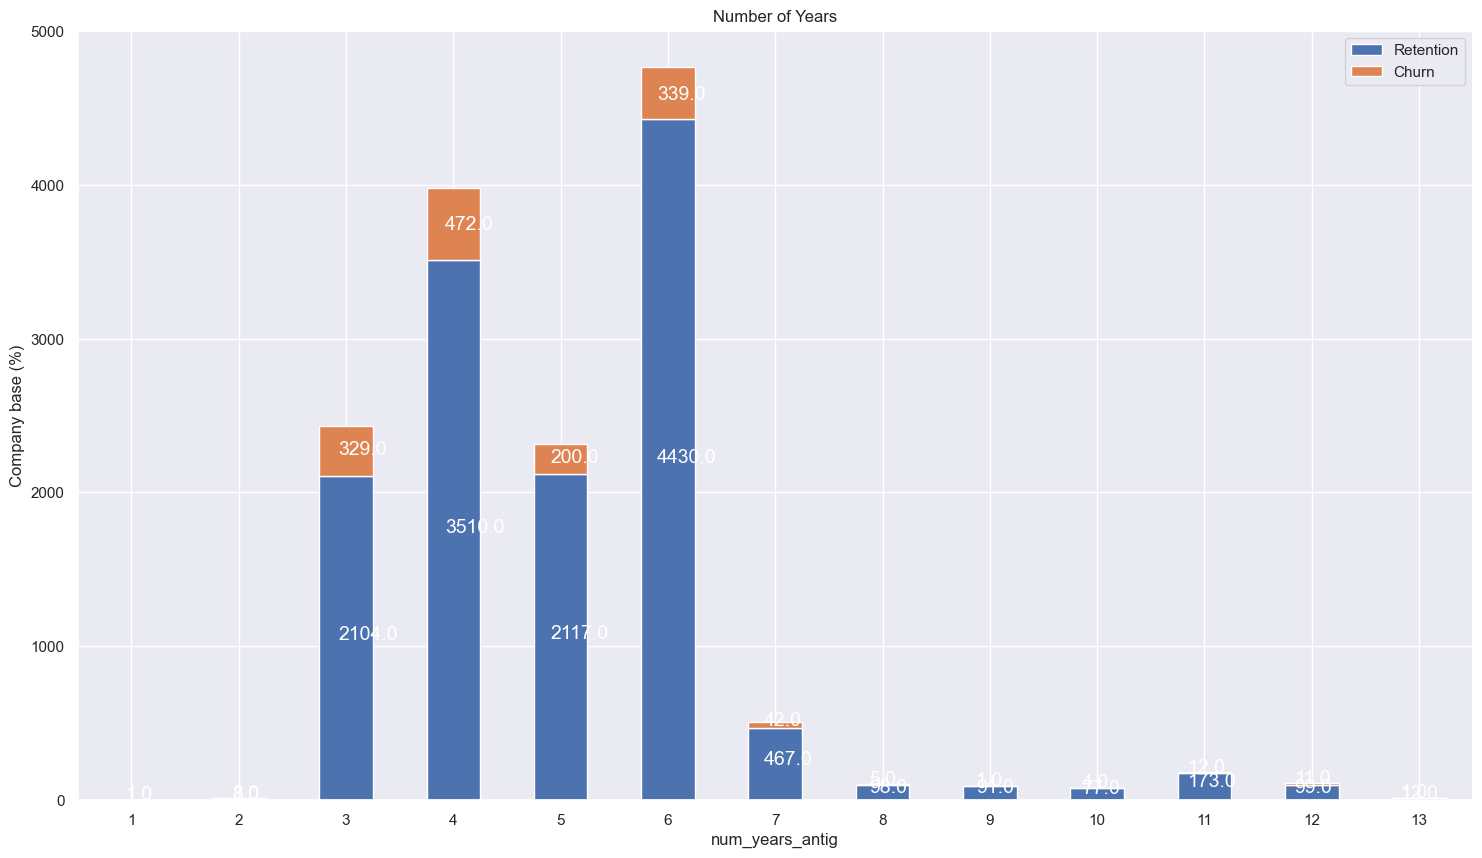

In [179]:
plot_stacked_bars(years_antig, 'Number of Years')

The plot above shows that churn is existent for those who have been clients for at least 2 years, not new clients. The percentage of 27.3% churn in clients with 2 years of antiquity is more than double than the second highest percentage. Meaning that maybe those did not get the best deals during that period and are unhappy with their situation.

### Contract Start Year

## Price Visualisation

Now it is time to explore the price distributions.
The following histograms illustrate a distribution that is categorical for fix prices (as expected), and more distributed in variable prices. However, there are peaks at 0 for all of the mid peak and peak features, therefore it makes sense to explore further the off peak distributions.

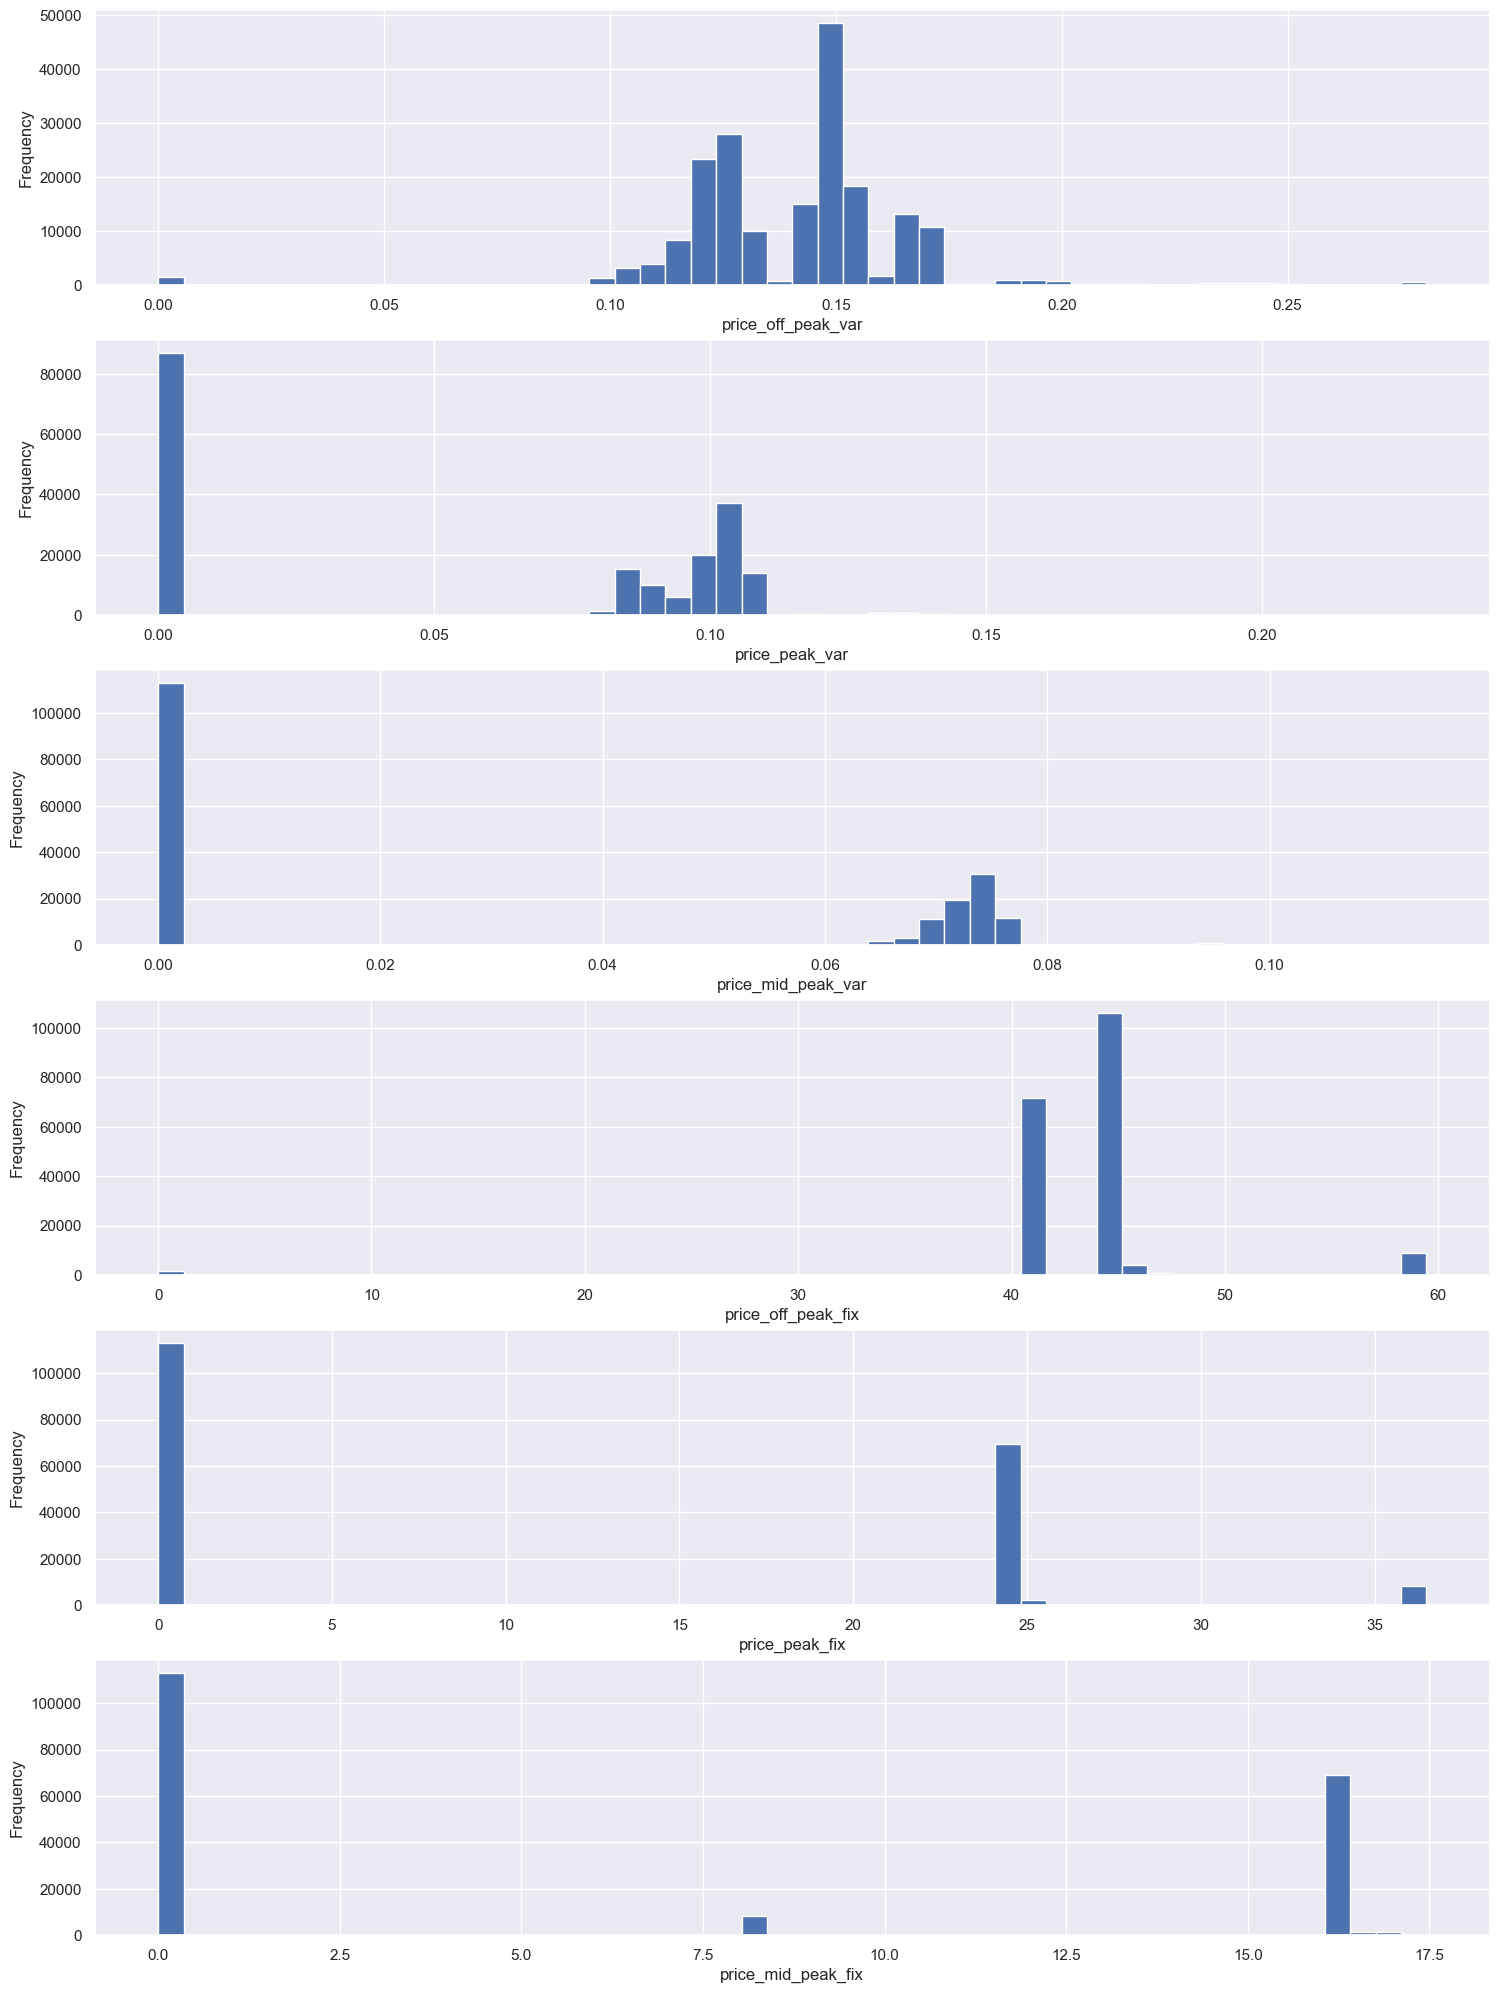

In [180]:
fig, axs = plt.subplots(nrows=6, figsize=(18,25))

# Llamar a la función para plotear el histograma
plot_simple_histogram(price_data, 'price_off_peak_var', axs[0], bins_=50)
plot_simple_histogram(price_data, 'price_peak_var', axs[1], bins_=50)
plot_simple_histogram(price_data, 'price_mid_peak_var', axs[2], bins_=50)
plot_simple_histogram(price_data, 'price_off_peak_fix',axs[3], bins_=50)
plot_simple_histogram(price_data, 'price_peak_fix',axs[4], bins_=50)
plot_simple_histogram(price_data, 'price_mid_peak_fix',axs[5], bins_=50)

## Hypothesis testing

Here below, we are testing the hypothesis whether price sensitivity being is to some extent correlated with churn. To do so, we will define price sensitivity as the change in price, and churn. 

    > For each dataframe, we have the prices at the beginning and end of the year. A good way to measure the change is to take the prices at the end of the year and at the beginning and obtain the difference. However, it is more useful if we take the mean price for the year, and other periods of time. In this case: 1 year, 6 last months, 3 last months. 



In [181]:
''' 
    The first step in order to sort correctly the data is to stablish all those columns that contain dates as datetime format.
    Then, to stablish the mean in price for each id in the periods mentioned earlier.
    After that, the 3 dataframes will be combined into a single one to merge it with the client dataframe and get churn information 
    in order to get the correlation matrix.

'''

import datetime

# datetime type
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
client_data['date_end'] = pd.to_datetime(client_data['date_activ'])
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'])
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'])

# grouping prices by id and mean
mean_12m = price_data.groupby('id').mean().reset_index()
mean_6m =  price_data[price_data['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby('id').mean().reset_index()

#rename columns to specific dates 
mean_12m = mean_12m.rename(
    index=str, 
    columns= {
        "price_off_peak_var": "mean_12m_price_p1_var",
        "price_peak_var": "mean_12m_price_p2_var",
        "price_mid_peak_var": "mean_12m_price_p3_var",
        "price_off_peak_fix": "mean_12m_price_p1_fix",
        "price_peak_fix": "mean_12m_price_p2_fix",
        "price_mid_peak_fix": "mean_12m_price_p3_fix"
    }    
)

mean_12m["mean_12m_price_p1"] = mean_12m["mean_12m_price_p1_var"] + mean_12m["mean_12m_price_p1_fix"]
mean_12m["mean_12m_price_p2"] = mean_12m["mean_12m_price_p2_var"] + mean_12m["mean_12m_price_p2_fix"]
mean_12m["mean_12m_price_p3"] = mean_12m["mean_12m_price_p3_var"] + mean_12m["mean_12m_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_6m_price_p1_var",
        "price_peak_var": "mean_6m_price_p2_var",
        "price_mid_peak_var": "mean_6m_price_p3_var",
        "price_off_peak_fix": "mean_6m_price_p1_fix",
        "price_peak_fix": "mean_6m_price_p2_fix",
        "price_mid_peak_fix": "mean_6m_price_p3_fix"

    }
)

mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"

    }
)

mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]


# Merge into 1 dataframe
price_features = pd.merge(mean_12m, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()


/var/folders/zk/6ht630915hxgxw31_05dy9vh0000gn/T/ipykernel_74304/4201385816.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_12m = price_data.groupby('id').mean().reset_index()
/var/folders/zk/6ht630915hxgxw31_05dy9vh0000gn/T/ipykernel_74304/4201385816.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_6m =  price_data[price_data['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
/var/folders/zk/6ht630915hxgxw31_05dy9vh0000gn/T/ipykernel_74304/4201385816.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_

,id,mean_12m_price_p1_var,mean_12m_price_p2_var,mean_12m_price_p3_var,mean_12m_price_p1_fix,mean_12m_price_p2_fix,mean_12m_price_p3_fix,mean_12m_price_p1,mean_12m_price_p2,mean_12m_price_p3,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


The following code will output a correlation matrix in which the linear correlation between the churn and the prices will be observed.

/var/folders/zk/6ht630915hxgxw31_05dy9vh0000gn/T/ipykernel_74304/2412071975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


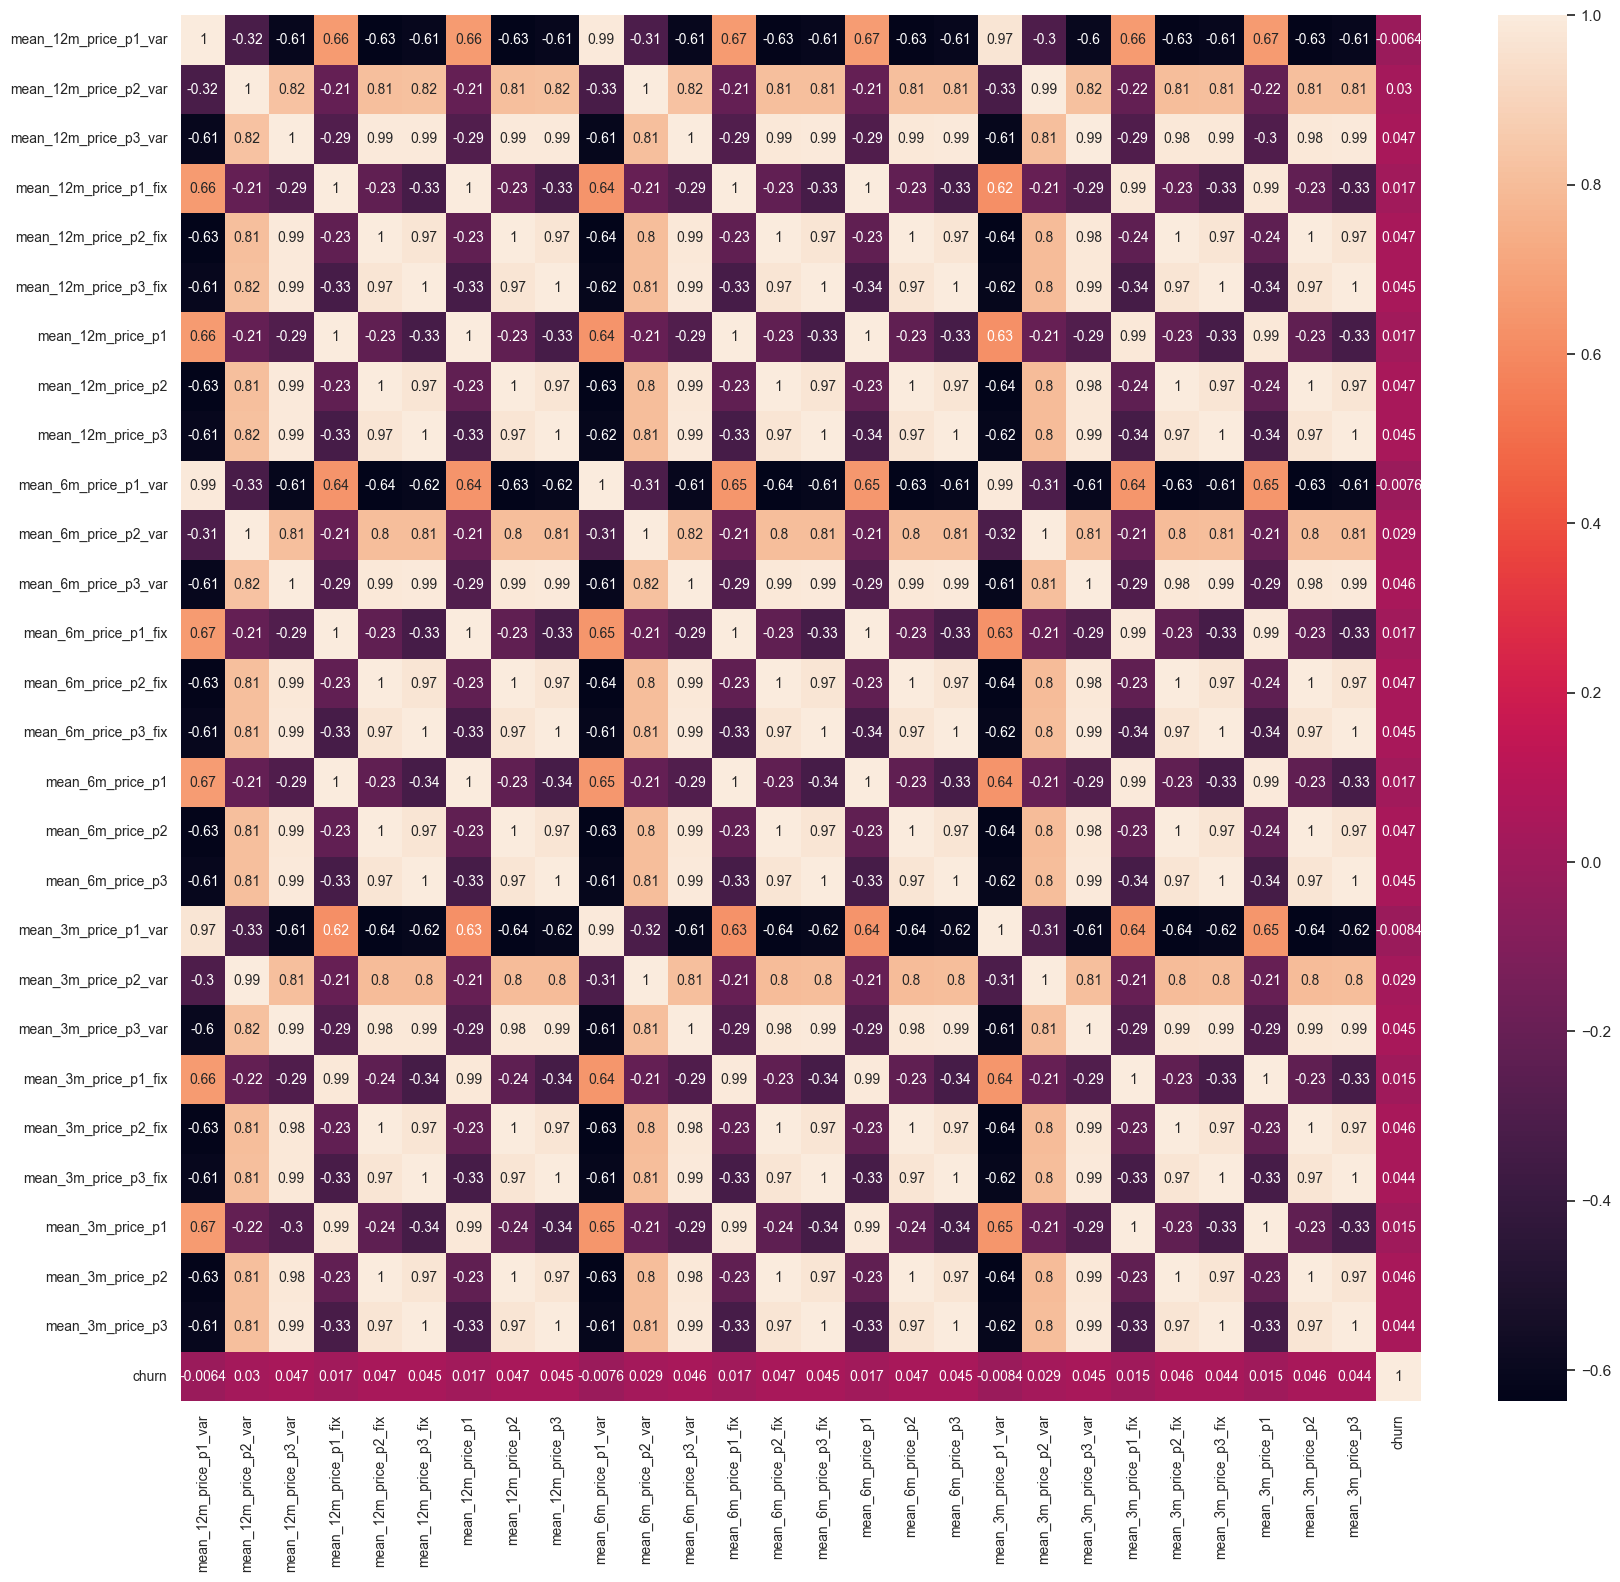

In [182]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As it can be seen from the heatmap above, the churn presents a significantly low correlation with the different prices. This means that there is a very low or almost inexistent linear correlation between prices and churn. However, this does not mean that there is no relationship between churn and price sensitivity, and the relationship between those features and the churn could be found using a model. 

This suggests that the next steps are to perform feature engineering and model development.

The next step is to save a new dataset to use for modelling.

In [183]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis, on='id')
merged_data.to_csv('clean_data_after_eda.csv')

In [184]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2013-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2009-08-21,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2010-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2010-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,2010-01-13,2010-01-13,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
